Dieses Notebook visualisiert die Vorhersagen des letzen Modells sowie die Ground Truth Annotationen.

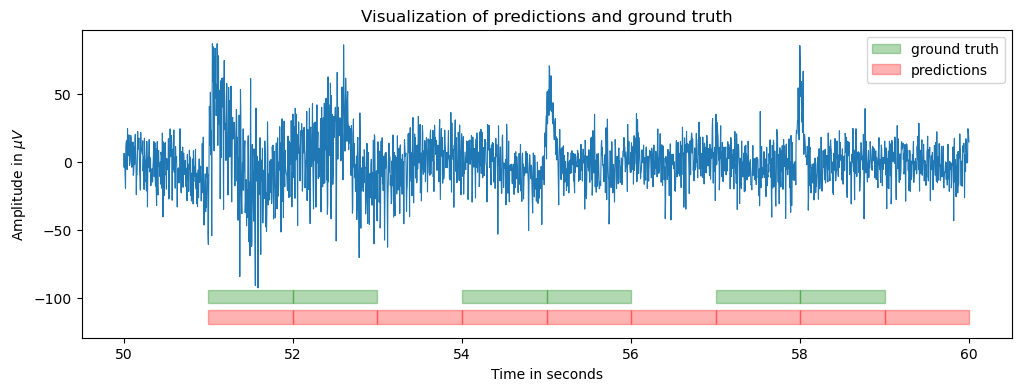

In [4]:
import h5py
import numpy as np
import pyedflib
import os
from utils.visualization import visualize_model_predictions
import joblib
from matplotlib import pyplot as plt

dataset_path = '../../../../tuar_processed'
feature_file = './features/features.hdf5'
recording = 'aaaaaezj_s007_t002'
channel = 'FP1-F7'
model_path = './models/16-11-25 12-23-07.joblib'
features = ['mean', 'variance', 'std', 'ptp_amp', 'kurtosis', 'quantile', 'pow_freq_bands', 'hurst_exp', 'line_length',
            'rms', 'higuchi_fd', 'spect_entropy', 'svd_entropy', 'teager_kaiser_energy', 'wavelet_coef_energy',
            'zero_crossings']
start = 50
stop = 60

fig, axes = plt.subplots(figsize=(12, 4))

with h5py.File(feature_file) as f:
    channel_group = f[recording][channel]
    feature_vector_list = []
    if not features:
        features = [feat for feat in channel_group.keys() if not feat == 'labels']
    for feature in features:
        feature_vector_list.append(channel_group[feature][:])
    feature_matrix = np.column_stack(feature_vector_list)
    y_true = channel_group['labels'][:]

recording_edf = recording + '.edf'

for root, dirs, files in os.walk(dataset_path):
    if recording_edf not in files:
        continue

    recording_edf_path = os.path.join(root, recording_edf)
    with pyedflib.EdfReader(recording_edf_path) as reader:
        channel_data = reader.readSignal(reader.getSignalLabels().index(channel))

clf = joblib.load(model_path)

y_pred = clf.predict(feature_matrix)

axes = visualize_model_predictions(axes, channel_data, y_true, y_pred, start, stop)
fig.savefig('output/exp_03_08_prediction_visualization_1.pdf', bbox_inches='tight')
fig.show()

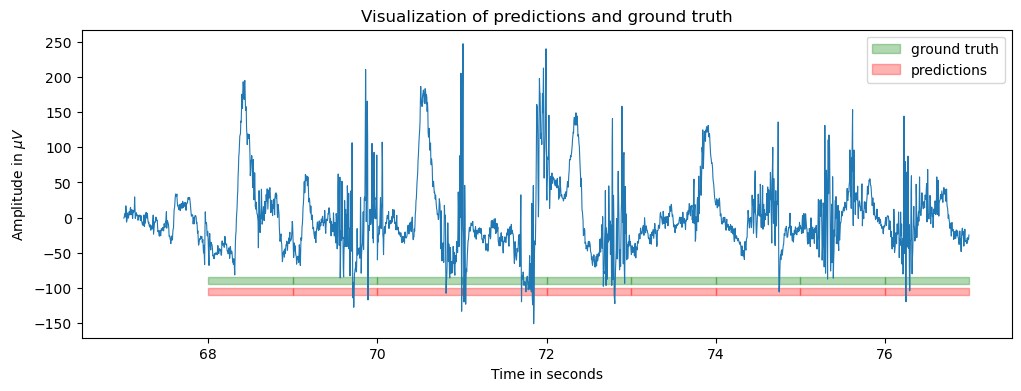

In [3]:
import h5py
import numpy as np
import pyedflib
import os
from utils.visualization import visualize_model_predictions
import joblib
from matplotlib import pyplot as plt

dataset_path = '../../../../tuar_processed'
feature_file = './features/features.hdf5'
recording = 'aaaaadmi_s012_t005'
channel = 'FP1-F7'
model_path = './models/16-11-25 12-23-07.joblib'
features = ['mean', 'variance', 'std', 'ptp_amp', 'kurtosis', 'quantile', 'pow_freq_bands', 'hurst_exp', 'line_length',
            'rms', 'higuchi_fd', 'spect_entropy', 'svd_entropy', 'teager_kaiser_energy', 'wavelet_coef_energy',
            'zero_crossings']
start = 67
stop = 77

fig, axes = plt.subplots(figsize=(12, 4))

with h5py.File(feature_file) as f:
    channel_group = f[recording][channel]
    feature_vector_list = []
    if not features:
        features = [feat for feat in channel_group.keys() if not feat == 'labels']
    for feature in features:
        feature_vector_list.append(channel_group[feature][:])
    feature_matrix = np.column_stack(feature_vector_list)
    y_true = channel_group['labels'][:]

recording_edf = recording + '.edf'

for root, dirs, files in os.walk(dataset_path):
    if recording_edf not in files:
        continue

    recording_edf_path = os.path.join(root, recording_edf)
    with pyedflib.EdfReader(recording_edf_path) as reader:
        channel_data = reader.readSignal(reader.getSignalLabels().index(channel))

clf = joblib.load(model_path)

y_pred = clf.predict(feature_matrix)

axes = visualize_model_predictions(axes, channel_data, y_true, y_pred, start, stop)
fig.savefig('output/exp_03_08_prediction_visualization_2.pdf', bbox_inches='tight')
fig.show()

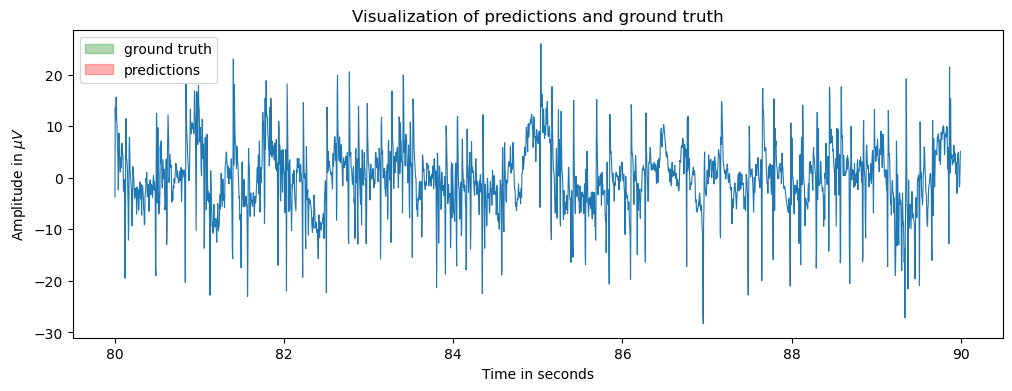

In [5]:
import h5py
import numpy as np
import pyedflib
import os
from utils.visualization import visualize_model_predictions
import joblib
from matplotlib import pyplot as plt

dataset_path = '../../../../tuar_processed'
feature_file = './features/features.hdf5'
recording = 'aaaaaovl_s001_t000'
channel = 'F7-T3'
model_path = './models/16-11-25 12-23-07.joblib'
features = ['mean', 'variance', 'std', 'ptp_amp', 'kurtosis', 'quantile', 'pow_freq_bands', 'hurst_exp', 'line_length',
            'rms', 'higuchi_fd', 'spect_entropy', 'svd_entropy', 'teager_kaiser_energy', 'wavelet_coef_energy',
            'zero_crossings']
start = 80
stop = 90

fig, axes = plt.subplots(figsize=(12, 4))

with h5py.File(feature_file) as f:
    channel_group = f[recording][channel]
    feature_vector_list = []
    if not features:
        features = [feat for feat in channel_group.keys() if not feat == 'labels']
    for feature in features:
        feature_vector_list.append(channel_group[feature][:])
    feature_matrix = np.column_stack(feature_vector_list)
    y_true = channel_group['labels'][:]

recording_edf = recording + '.edf'

for root, dirs, files in os.walk(dataset_path):
    if recording_edf not in files:
        continue

    recording_edf_path = os.path.join(root, recording_edf)
    with pyedflib.EdfReader(recording_edf_path) as reader:
        channel_data = reader.readSignal(reader.getSignalLabels().index(channel))

clf = joblib.load(model_path)

y_pred = clf.predict(feature_matrix)

axes = visualize_model_predictions(axes, channel_data, y_true, y_pred, start, stop)
fig.savefig('output/exp_03_08_prediction_visualization_3.pdf', bbox_inches='tight')
fig.show()

Insgesamt hat das Modell in diesem Beispiel kein False Negative erkannt und die Performance scheint in diesen drei zufälligen Beispielen ut zu sein. Im Folgenden noch einmal ein Kanal, der mir aufgefallen ist, bei dem ein Artefakt über 1300 Sekunden dauert.

In [ ]:
import h5py
import numpy as np
import pyedflib
import os
from utils.visualization import visualize_model_predictions
import joblib
from matplotlib import pyplot as plt

dataset_path = '../../../../tuar_processed'
feature_file = './features/features.hdf5'
recording = 'aaaaaovl_s001_t000'
channel = 'FP1-F7'
model_path = './models/16-11-25 12-23-07.joblib'
features = ['mean', 'variance', 'std', 'ptp_amp', 'kurtosis', 'quantile', 'pow_freq_bands', 'hurst_exp', 'line_length',
            'rms', 'higuchi_fd', 'spect_entropy', 'svd_entropy', 'teager_kaiser_energy', 'wavelet_coef_energy',
            'zero_crossings']

with h5py.File(feature_file) as f:
    channel_group = f[recording][channel]
    feature_vector_list = []
    if not features:
        features = [feat for feat in channel_group.keys() if not feat == 'labels']
    for feature in features:
        feature_vector_list.append(channel_group[feature][:])
    feature_matrix = np.column_stack(feature_vector_list)
    y_true = channel_group['labels'][:]

recording_edf = recording + '.edf'

for root, dirs, files in os.walk(dataset_path):
    if recording_edf not in files:
        continue

    recording_edf_path = os.path.join(root, recording_edf)
    with pyedflib.EdfReader(recording_edf_path) as reader:
        channel_data = reader.readSignal(reader.getSignalLabels().index(channel))

clf = joblib.load(model_path)

y_pred = clf.predict(feature_matrix)

print(np.sum(y_true), np.sum(y_pred))

1356 211


In [ ]:
import os
import pandas as pd
import numpy as np

session_channel_tuples = []
artifact_durations = []

for root, dirs, files in os.walk(dataset_path):
    if os.path.basename(root) in ['unsorted', 'test']:
        continue
    for file in files:
        if not file.endswith('.csv'):
            continue

        df = pd.read_csv(os.path.join(root, file), comment='#')
        df = df[df['label'] == 'musc']
        df['duration'] = df['stop_time'] - df['start_time']
        artifact_durations.extend(df['duration'].values)
        session_channel_tuples.extend(zip([os.path.splitext(file)[0]] * len(df), df['channel'])) 

artifact_durations = np.array(artifact_durations)
session_channel_tuples = np.array(session_channel_tuples)

In [42]:
idx = np.flip(np.argsort(artifact_durations))
session_channel_tuples[idx][:10]

array([['aaaaapcu_s001_t000', 'P3-O1'],
       ['aaaaapcu_s001_t000', 'F4-C4'],
       ['aaaaapcu_s001_t000', 'T3-T5'],
       ['aaaaapcu_s001_t000', 'T4-T6'],
       ['aaaaapcu_s001_t000', 'C4-P4'],
       ['aaaaapcu_s001_t000', 'T5-O1'],
       ['aaaaapcu_s001_t000', 'C3-P3'],
       ['aaaaapcu_s001_t000', 'F7-T3'],
       ['aaaaapcu_s001_t000', 'A1-T3'],
       ['aaaaapcu_s001_t000', 'T4-A2']], dtype='<U18')

Hiermit sieht man, dass vor ein Recording die längsten 10 Muskelartefakte stellt. Dieses Recording ist im Trainingsset

In [43]:
import h5py
import numpy as np
import pyedflib
import os
from utils.visualization import visualize_model_predictions
import joblib
from matplotlib import pyplot as plt

dataset_path = '../../../../tuar_processed'
feature_file = './features/features.hdf5'
recording = 'aaaaapcu_s001_t000'
channel = 'P3-O1'
model_path = './models/16-11-25 12-23-07.joblib'
features = ['mean', 'variance', 'std', 'ptp_amp', 'kurtosis', 'quantile', 'pow_freq_bands', 'hurst_exp', 'line_length',
            'rms', 'higuchi_fd', 'spect_entropy', 'svd_entropy', 'teager_kaiser_energy', 'wavelet_coef_energy',
            'zero_crossings']

with h5py.File(feature_file) as f:
    channel_group = f[recording][channel]
    feature_vector_list = []
    if not features:
        features = [feat for feat in channel_group.keys() if not feat == 'labels']
    for feature in features:
        feature_vector_list.append(channel_group[feature][:])
    feature_matrix = np.column_stack(feature_vector_list)
    y_true = channel_group['labels'][:]

recording_edf = recording + '.edf'

for root, dirs, files in os.walk(dataset_path):
    if recording_edf not in files:
        continue

    recording_edf_path = os.path.join(root, recording_edf)
    with pyedflib.EdfReader(recording_edf_path) as reader:
        channel_data = reader.readSignal(reader.getSignalLabels().index(channel))

clf = joblib.load(model_path)

y_pred = clf.predict(feature_matrix)

print(np.sum(y_true), np.sum(y_pred))

2403 1510
